In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/MyDrive/ML QUEST/airquality/city_day.csv'
df = pd.read_csv(file_path)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df = df.drop(columns=['City', 'Date', 'AQI_Bucket'])

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(columns=['AQI'])
y = df_imputed['AQI']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor()

In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
mean_percentage_error = (abs((y_test - y_pred) / y_test).mean()) * 100
median_percentage_error = (abs((y_test - y_pred) / y_test).median()) * 100
accuracy_10 = (abs((y_test - y_pred) / y_test) < 0.10).mean() * 100
accuracy_20 = (abs((y_test - y_pred) / y_test) < 0.20).mean() * 100

In [ ]:
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R² Score: {r2:.2f}')
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')
print(f'Median Percentage Error: {median_percentage_error:.2f}%')
print(f'Accuracy within 10% Error: {accuracy_10:.2f}%')
print(f'Accuracy within 20% Error: {accuracy_20:.2f}%')

importance = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Mean Absolute Error (MAE): 20.68
Root Mean Squared Error (RMSE): 42.52
R² Score: 0.88
Mean Percentage Error: 14.53%
Median Percentage Error: 8.52%
Accuracy within 10% Error: 55.44%
Accuracy within 20% Error: 79.06%
    Feature  Importance
6        CO    0.377539
0     PM2.5    0.315740
1      PM10    0.061409
12     Year    0.061044
2        NO    0.039528
8        O3    0.019860
4       NOx    0.018921
10  Toluene    0.017028
3       NO2    0.015996
7       SO2    0.015355
11   Xylene    0.014631
14      Day    0.013873
13    Month    0.011684
9   Benzene    0.009606
5       NH3    0.007786


<ipython-input-50-957b84307406>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')


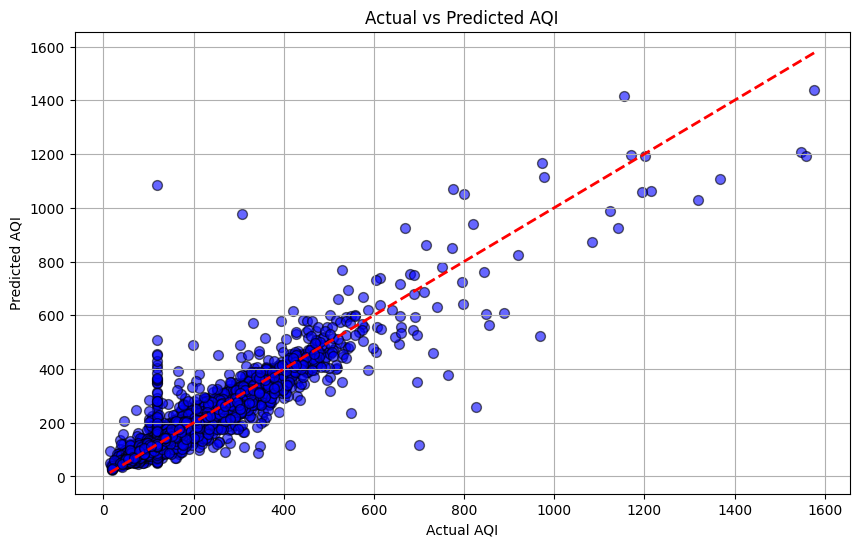

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.grid(True)
plt.show()
